## Kaggle/EDA & Neural Network, Logistic Regression, KNN on Hotel Booking Demand

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
def missing_values(df):
    return {i:df[i].isna().sum() for i in df.columns}

In [7]:
missing_values(df)

{'hotel': 0,
 'is_canceled': 0,
 'lead_time': 0,
 'arrival_date_year': 0,
 'arrival_date_month': 0,
 'arrival_date_week_number': 0,
 'arrival_date_day_of_month': 0,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 0,
 'adults': 0,
 'children': 4,
 'babies': 0,
 'meal': 0,
 'country': 488,
 'market_segment': 0,
 'distribution_channel': 0,
 'is_repeated_guest': 0,
 'previous_cancellations': 0,
 'previous_bookings_not_canceled': 0,
 'reserved_room_type': 0,
 'assigned_room_type': 0,
 'booking_changes': 0,
 'deposit_type': 0,
 'agent': 16340,
 'company': 112593,
 'days_in_waiting_list': 0,
 'customer_type': 0,
 'adr': 0,
 'required_car_parking_spaces': 0,
 'total_of_special_requests': 0,
 'reservation_status': 0,
 'reservation_status_date': 0}

In [8]:
df=df.drop(["company","agent"],axis=1)

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [10]:
df=df.dropna()

In [11]:
df.corr()["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.291994
previous_cancellations            0.109922
adults                            0.058381
days_in_waiting_list              0.054016
adr                               0.046199
stays_in_week_nights              0.024110
arrival_date_year                 0.016412
arrival_date_week_number          0.007465
children                          0.004751
stays_in_weekend_nights          -0.002631
arrival_date_day_of_month        -0.006127
babies                           -0.032521
previous_bookings_not_canceled   -0.055493
is_repeated_guest                -0.085179
booking_changes                  -0.144659
required_car_parking_spaces      -0.194796
total_of_special_requests        -0.235643
Name: is_canceled, dtype: float64

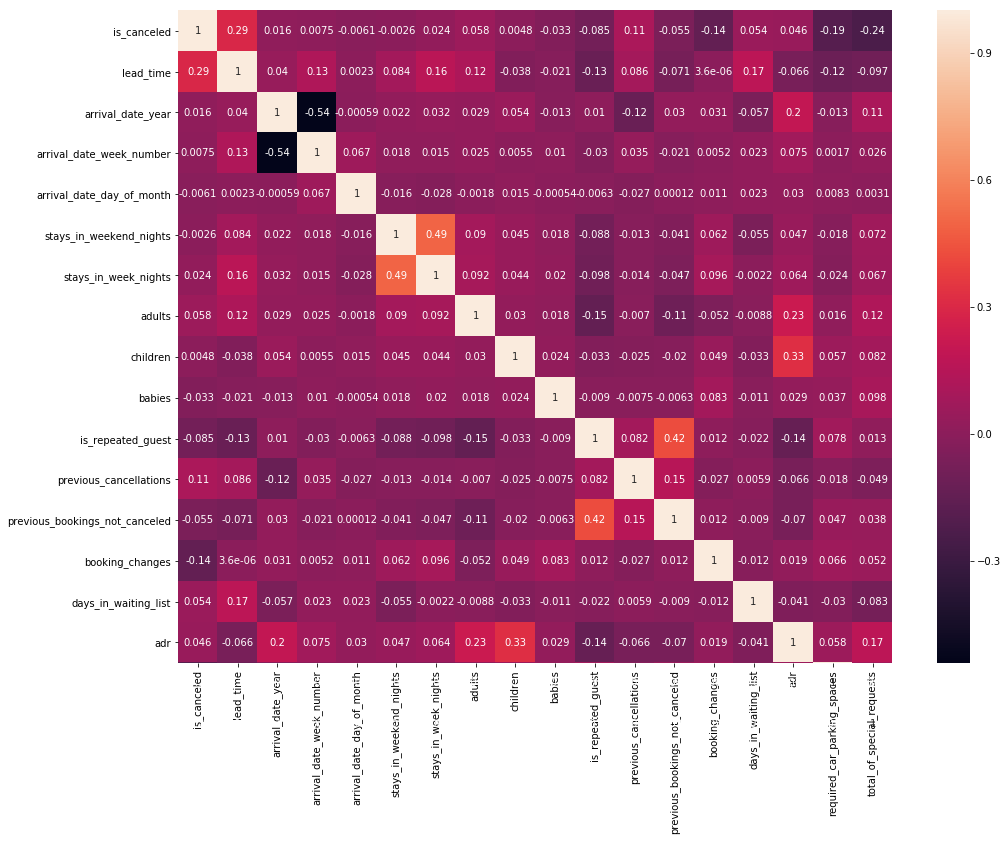

In [12]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)
plt.ylim(16,0);

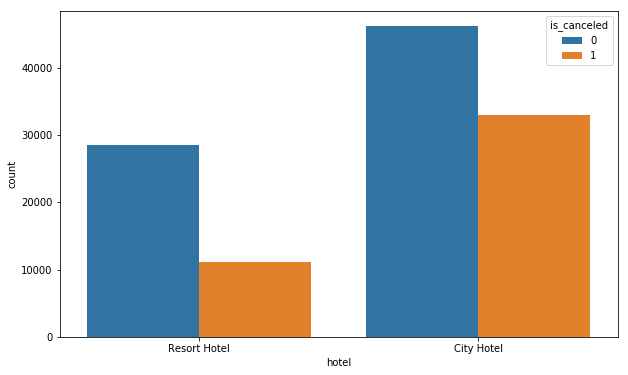

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x="hotel",hue="is_canceled",data=df);

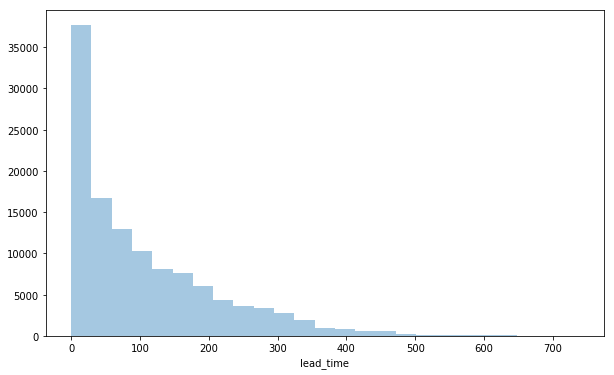

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df["lead_time"],bins=25,
             kde=False);

In [15]:
df["arrival_date_year"].value_counts()

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

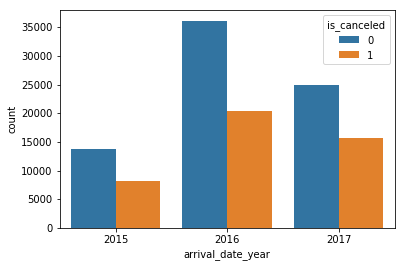

In [16]:
sns.countplot(x="arrival_date_year",hue="is_canceled",data=df)

In [17]:
df["arrival_date_month"].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

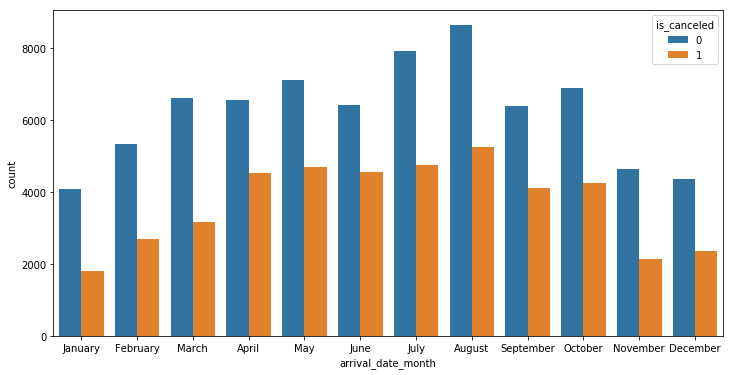

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="arrival_date_month",hue="is_canceled",data=df,
              order=["January","February","March","April","May","June","July","August","September","October","November","December"]);

In [19]:
df=df.drop("arrival_date_week_number",axis=1) # It seems similiar to month so we have to drop it

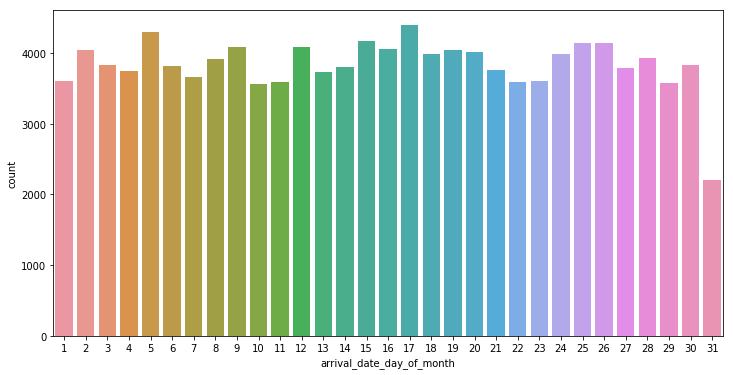

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="arrival_date_day_of_month",data=df);

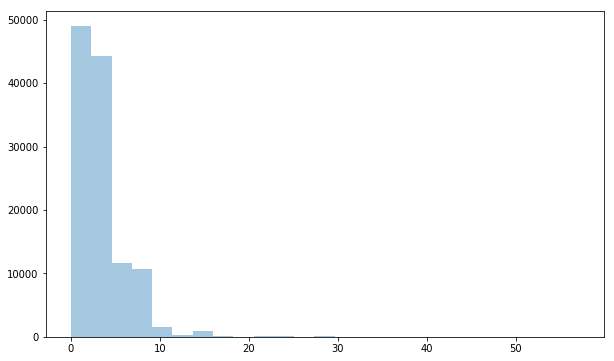

In [21]:
plt.figure(figsize=(10,6))
sns.distplot((df["stays_in_weekend_nights"] + df["stays_in_week_nights"]),kde=False,bins=25);

In [22]:
df["adults"].value_counts()

2     89495
1     22735
3      6197
0       393
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

In [23]:
df["children"].value_counts()

0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

In [24]:
df["babies"].value_counts()

0     117984
1        898
2         14
10         1
9          1
Name: babies, dtype: int64

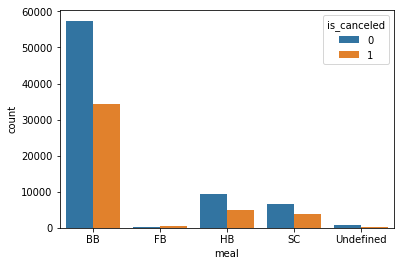

In [25]:
sns.countplot(x="meal",hue="is_canceled",data=df);

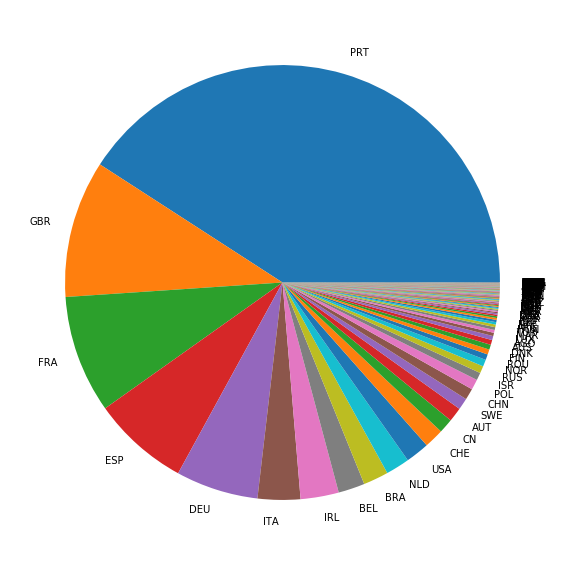

In [26]:
countries=df["country"].value_counts().index
comes=list(df["country"].value_counts().values)
plt.figure(figsize=(15,10))
plt.pie(comes,labels=countries);

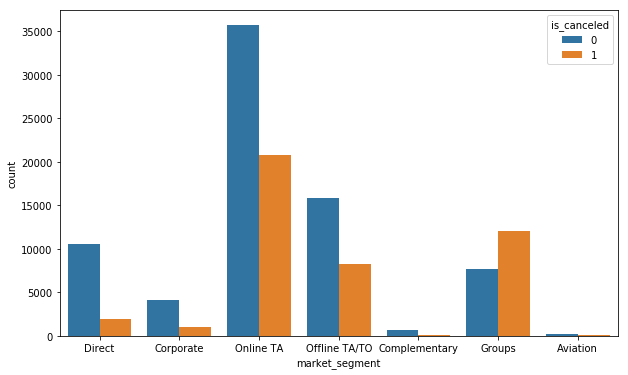

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df["market_segment"],hue="is_canceled",data=df);

In [28]:
numeric_f= ["lead_time","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights",
            "adults","children","babies","is_repeated_guest", "previous_cancellations","previous_bookings_not_canceled",
            "required_car_parking_spaces", "total_of_special_requests", "adr"]

categorical_f= ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

all_cols = numeric_f + categorical_f +["is_canceled"]

In [29]:
df_new=df[all_cols]
df=pd.get_dummies(df_new,columns=categorical_f,drop_first=True)

In [30]:
X=df.drop("is_canceled",axis=1).values
y=df["is_canceled"].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=MinMaxScaler()

X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report 

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="lbfgs",max_iter=1000)
log_reg.fit(X_train_sc,y_train)
log_predict=log_reg.predict(X_test_sc)

In [34]:
print("Accuracy score of Logistic Regression :",accuracy_score(y_test,log_predict))
print("*"*125)
print("\nConfusion Matrix of Logistic Regression :\n",confusion_matrix(y_test,log_predict))
print("*"*125)
print("\nClassification report of Logistic Regression : \n\n",classification_report(y_test,log_predict))

Accuracy score of Logistic Regression : 0.8026913372582002
*****************************************************************************************************************************

Confusion Matrix of Logistic Regression :
 [[13954   891]
 [ 3801  5134]]
*****************************************************************************************************************************

Classification report of Logistic Regression : 

               precision    recall  f1-score   support

           0       0.79      0.94      0.86     14845
           1       0.85      0.57      0.69      8935

   micro avg       0.80      0.80      0.80     23780
   macro avg       0.82      0.76      0.77     23780
weighted avg       0.81      0.80      0.79     23780



In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc,y_train)
knn_predict=knn.predict(X_test_sc)

In [36]:
print("Accuracy score of KNN :",accuracy_score(y_test,knn_predict))
print("*"*125)
print("\nConfusion Matrix of KNN :\n",confusion_matrix(y_test,knn_predict))
print("*"*125)
print("\nClassification report of KNN : \n\n",classification_report(y_test,knn_predict))

Accuracy score of KNN : 0.8048359966358284
*****************************************************************************************************************************

Confusion Matrix of KNN :
 [[13054  1791]
 [ 2850  6085]]
*****************************************************************************************************************************

Classification report of KNN : 

               precision    recall  f1-score   support

           0       0.82      0.88      0.85     14845
           1       0.77      0.68      0.72      8935

   micro avg       0.80      0.80      0.80     23780
   macro avg       0.80      0.78      0.79     23780
weighted avg       0.80      0.80      0.80     23780



In [37]:
import tensorflow as tf

In [38]:
X_train.shape

(95118, 53)

In [44]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=60,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=30,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=15,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

In [45]:
model.fit(X_train_sc,y_train,validation_data=(X_test_sc,y_test),epochs=250)

Train on 95118 samples, validate on 23780 samples
Epoch 1/250
95118/95118 [==============================] - 5s 48us/sample - loss: 0.4693 - val_loss: 0.4257
Epoch 2/250
95118/95118 [==============================] - 4s 46us/sample - loss: 0.4315 - val_loss: 0.4144
Epoch 3/250
95118/95118 [==============================] - 4s 43us/sample - loss: 0.4205 - val_loss: 0.4090
Epoch 4/250
95118/95118 [==============================] - 5s 54us/sample - loss: 0.4127 - val_loss: 0.4034
Epoch 5/250
95118/95118 [==============================] - 4s 44us/sample - loss: 0.4079 - val_loss: 0.3979
Epoch 6/250
95118/95118 [==============================] - 4s 40us/sample - loss: 0.4041 - val_loss: 0.3939
Epoch 7/250
95118/95118 [==============================] - 4s 40us/sample - loss: 0.4013 - val_loss: 0.3908
Epoch 8/250
95118/95118 [==============================] - 4s 39us/sample - loss: 0.3985 - val_loss: 0.3936
Epoch 9/250
95118/95118 [==============================] - 4s 41us/sample - loss: 0.39

Epoch 76/250
95118/95118 [==============================] - 4s 45us/sample - loss: 0.3725 - val_loss: 0.3747
Epoch 77/250
95118/95118 [==============================] - 4s 39us/sample - loss: 0.3713 - val_loss: 0.3751
Epoch 78/250
95118/95118 [==============================] - 4s 37us/sample - loss: 0.3707 - val_loss: 0.3766
Epoch 79/250
95118/95118 [==============================] - 4s 45us/sample - loss: 0.3722 - val_loss: 0.3743
Epoch 80/250
95118/95118 [==============================] - 4s 44us/sample - loss: 0.3716 - val_loss: 0.3754
Epoch 81/250
95118/95118 [==============================] - 4s 44us/sample - loss: 0.3708 - val_loss: 0.3744
Epoch 82/250
95118/95118 [==============================] - 4s 45us/sample - loss: 0.3718 - val_loss: 0.3735
Epoch 83/250
95118/95118 [==============================] - 4s 46us/sample - loss: 0.3710 - val_loss: 0.3748
Epoch 84/250
95118/95118 [==============================] - 5s 50us/sample - loss: 0.3713 - val_loss: 0.3753
Epoch 85/250
95118/

95118/95118 [==============================] - 4s 38us/sample - loss: 0.3668 - val_loss: 0.3726
Epoch 151/250
95118/95118 [==============================] - 4s 41us/sample - loss: 0.3662 - val_loss: 0.3709
Epoch 152/250
95118/95118 [==============================] - 4s 46us/sample - loss: 0.3651 - val_loss: 0.3727
Epoch 153/250
95118/95118 [==============================] - 4s 41us/sample - loss: 0.3665 - val_loss: 0.3706
Epoch 154/250
95118/95118 [==============================] - 4s 42us/sample - loss: 0.3655 - val_loss: 0.3728
Epoch 155/250
95118/95118 [==============================] - 4s 40us/sample - loss: 0.3649 - val_loss: 0.3712
Epoch 156/250
95118/95118 [==============================] - 4s 42us/sample - loss: 0.3646 - val_loss: 0.3702
Epoch 157/250
95118/95118 [==============================] - 4s 42us/sample - loss: 0.3661 - val_loss: 0.3707
Epoch 158/250
95118/95118 [==============================] - 4s 39us/sample - loss: 0.3657 - val_loss: 0.3711
Epoch 159/250
95118/9511

95118/95118 [==============================] - 4s 42us/sample - loss: 0.3617 - val_loss: 0.3698
Epoch 225/250
95118/95118 [==============================] - 4s 39us/sample - loss: 0.3623 - val_loss: 0.3696
Epoch 226/250
95118/95118 [==============================] - 4s 41us/sample - loss: 0.3618 - val_loss: 0.3689
Epoch 227/250
95118/95118 [==============================] - 4s 44us/sample - loss: 0.3614 - val_loss: 0.3688
Epoch 228/250
95118/95118 [==============================] - 4s 40us/sample - loss: 0.3610 - val_loss: 0.3698
Epoch 229/250
95118/95118 [==============================] - 4s 44us/sample - loss: 0.3626 - val_loss: 0.3688
Epoch 230/250
95118/95118 [==============================] - 4s 41us/sample - loss: 0.3633 - val_loss: 0.3687
Epoch 231/250
95118/95118 [==============================] - 4s 41us/sample - loss: 0.3631 - val_loss: 0.3706
Epoch 232/250
95118/95118 [==============================] - 4s 38us/sample - loss: 0.3618 - val_loss: 0.3696
Epoch 233/250
95118/9511

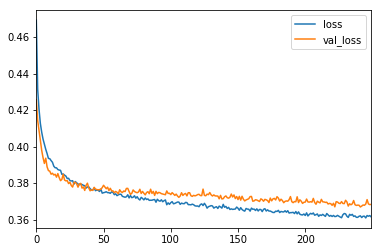

In [46]:
losses=pd.DataFrame(model.history.history)
ann_predict=model.predict_classes(X_test_sc)
losses.plot();

In [48]:
print("Accuracy score of 4Layer Neural Network :",accuracy_score(y_test,ann_predict))
print("*"*125)
print("\nConfusion Matrix of 4Layer Neural Network :\n",confusion_matrix(y_test,ann_predict))
print("*"*125)
print("\nClassification report of 4Layer Neural Network : \n\n",classification_report(y_test,ann_predict))

Accuracy score of 4Layer Neural Network : 0.8310344827586207
*****************************************************************************************************************************

Confusion Matrix of 4Layer Neural Network :
 [[13618  1227]
 [ 2791  6144]]
*****************************************************************************************************************************

Classification report of 4Layer Neural Network : 

               precision    recall  f1-score   support

           0       0.83      0.92      0.87     14845
           1       0.83      0.69      0.75      8935

   micro avg       0.83      0.83      0.83     23780
   macro avg       0.83      0.80      0.81     23780
weighted avg       0.83      0.83      0.83     23780

